## Section 5.1: Textual Data {-}

### Section 5.1.1: The Disputed Authorship of ‘The Federalist Papers’ {-}

#### Importing textual data into a DataFrame {-}

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
# Get a list of all txt files in the federalist directory
file_paths = glob.glob('federalist/*.txt')

# Create an empty list
file_contents = []

# Read txt files into the empty list
for file in file_paths:
    # with: open and close file automatically
    # open(file, 'r'): open file in read mode
    # assign opened file to f
    with open(file, 'r') as f:
        file_contents.append(f.read())

# Take a look at the first 100 characters of essay number 10
file_contents[9][:100]

'AMONG the numerous advantages promised by a well-constructed Union, none \n        deserves to be mor'

In [3]:
# Create a data frame with essay number, a placeholder for author, and the text
federalist = pd.DataFrame({'fed_num': np.arange(1,86), 'author': None,
                           'text': file_contents})

# store authorship information
hamilton = ([1] + list(range(6,10)) + list(range(11, 14)) + 
            list(range(15, 18)) + list(range(21, 37)) + list(range(59, 62)) + 
            list(range(65, 86)))

madison = [10] + [14] + list(range(37, 49)) + [58]

jay = list(range(2,6)) + [64]

joint = [18, 19, 20] # Madison and Hamilton

# store conditions for authorship
conditions = [
      federalist['fed_num'].isin(hamilton),
      federalist['fed_num'].isin(madison),
      federalist['fed_num'].isin(jay),
      federalist['fed_num'].isin(joint)
]

choices  = ['Hamilton', 'Madison', 'Jay', 'Joint']

# populate the author column; assign 'Disputed' to unassigned essays
federalist['author'] = np.select(conditions, choices, 'Disputed')

federalist

,fed_num,author,text
0,1,Hamilton,AFTER an unequivocal experience of the ineffic...
1,2,Jay,WHEN the people of America reflect that they a...
2,3,Jay,IT IS not a new observation that the people of...
3,4,Jay,MY LAST paper assigned several reasons why the...
4,5,Jay,"QUEEN ANNE, in her letter of the 1st July, 170..."
...,...,...,...
80,81,Hamilton,LET US now return to the partition of the judi...
81,82,Hamilton,"THE erection of a new government, whatever car..."
82,83,Hamilton,"THE objection to the plan of the convention, w..."
83,84,Hamilton,IN THE course of the foregoing review of the C...


In [4]:
federalist['author'].value_counts()

author
Hamilton    51
Madison     15
Disputed    11
Jay          5
Joint        3
Name: count, dtype: int64

#### Pre-processing textual data {-}

In [5]:
import re # regular expressions
import string # string manipulation
import nltk # natural language toolkit

# Pre-process the text using regular expressions, list comprehensions, apply() 

# make lower case and remove punctuation
federalist['text_processed'] = (
    federalist['text'].apply(lambda x: "".join(
        [word.lower() for word in x if word not in string.punctuation])
    )
)

federalist[['text', 'text_processed']].head()

,text,text_processed
0,AFTER an unequivocal experience of the ineffic...,after an unequivocal experience of the ineffic...
1,WHEN the people of America reflect that they a...,when the people of america reflect that they a...
2,IT IS not a new observation that the people of...,it is not a new observation that the people of...
3,MY LAST paper assigned several reasons why the...,my last paper assigned several reasons why the...
4,"QUEEN ANNE, in her letter of the 1st July, 170...",queen anne in her letter of the 1st july 1706 ...


In [6]:
# download stopwords: only need to run once
# nltk.download('stopwords')

# save and inspect stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
stopwords[-10:] # interestingly, includes wouldn't but not would

['shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [8]:
type(stopwords)

list

We can add to the list as appropriate. For example, 'would' is included in many stopword dictionaries. 

In [9]:
stopwords.append('would')

In [10]:
# instantiate the Porter stemmer to stem the words
ps = nltk.PorterStemmer()

'''
It is more efficient to define a function to apply to the text column than to 
use a lambda function for every step. 
'''
def preprocess_text(text):
    # make lower case
    text = text.lower()
    # remove punctuation
    text = "".join([word for word in text if word not in string.punctuation])
    # remove numbers 
    text = re.sub('[0-9]+', '', text)
    # create a list of individual tokens, removing whitespace
    tokens = re.split('\W+', text)
    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # remove any empty strings associated with trailing spaces
    tokens = [word for word in tokens if word !='']
    # finally, stem each word
    tokens = [ps.stem(word) for word in tokens]
    return tokens

# apply function to the text column; no need for lambda with a named function
federalist['text_processed'] = federalist['text'].apply(preprocess_text)

federalist[['text', 'text_processed']].head()

,text,text_processed
0,AFTER an unequivocal experience of the ineffic...,"[unequivoc, experi, ineffici, subsist, feder, ..."
1,WHEN the people of America reflect that they a...,"[peopl, america, reflect, call, upon, decid, q..."
2,IT IS not a new observation that the people of...,"[new, observ, peopl, countri, like, american, ..."
3,MY LAST paper assigned several reasons why the...,"[last, paper, assign, sever, reason, safeti, p..."
4,"QUEEN ANNE, in her letter of the 1st July, 170...","[queen, ann, letter, st, juli, scotch, parliam..."


In [11]:
# each element of the text_processed column is a list of tokens
type(federalist['text_processed'][0])

list

In [12]:
# compare the pre-processed text to the original text for essay number 10
federalist['text_processed'][9][:15]

['among',
 'numer',
 'advantag',
 'promis',
 'wellconstruct',
 'union',
 'none',
 'deserv',
 'accur',
 'develop',
 'tendenc',
 'break',
 'control',
 'violenc',
 'faction']

In [13]:
federalist['text'][9][:100]

'AMONG the numerous advantages promised by a well-constructed Union, none \n        deserves to be mor'

### Section 5.1.2: Document-Term Matrix {-}

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

'''
Instantiate the CountVectorizer and pass the preprocess_text function to the
analyzer argument.
'''
count_vect = CountVectorizer(analyzer=preprocess_text)

# transform the text_processed column into a document-term matrix
dtm = count_vect.fit_transform(federalist['text'])

# the dtm is a sparse matrix
type(dtm)

scipy.sparse._csr.csr_matrix

In [15]:
# convert the sparse matrix to a dense matrix and store in a DataFrame
dtm_mat = pd.DataFrame(dtm.toarray(), 
                       columns=count_vect.get_feature_names_out())

dtm_mat.iloc[:,:10].head()

,abandon,abat,abb,abet,abhorr,abil,abject,abl,ablest,abolish
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0


### Section 5.1.3: Topic Discovery {-}

Text(0.5, 1.0, 'Essay 24')

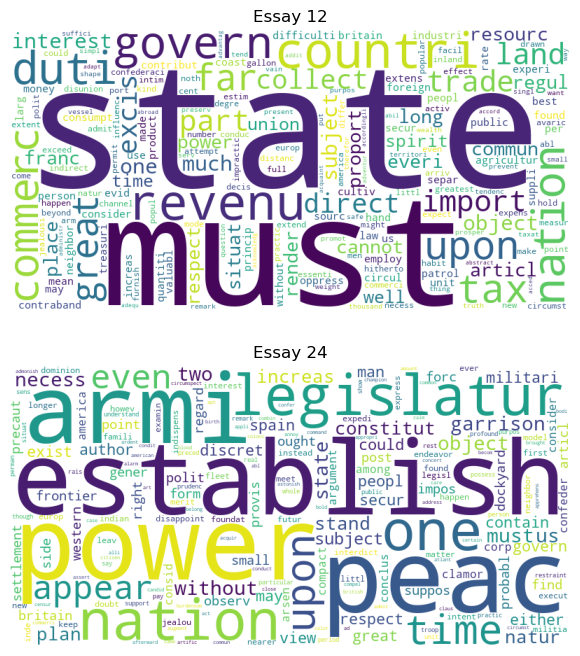

In [16]:
from wordcloud import WordCloud

essay_12 = dtm_mat.iloc[11,:]
essay_24 = dtm_mat.iloc[23,:]

# Essay 12 word cloud
wordcloud_12 = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(essay_12)

# Essay 24 word cloud
wordcloud_24 = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(essay_24)

# plot word clouds vertically
fig, axs = plt.subplots(2, 1, figsize=(8,8))

axs[0].imshow(wordcloud_12)
axs[0].axis('off')
axs[0].set_title('Essay 12')

axs[1].imshow(wordcloud_24)
axs[1].axis('off')
axs[1].set_title('Essay 24')

In [17]:
# Import the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tf-idf dtm following the same steps as before 
tfidf_vect = TfidfVectorizer(analyzer=preprocess_text)

dtm_tfidf = tfidf_vect.fit_transform(federalist['text'])

dtm_tfidf_mat = pd.DataFrame(dtm_tfidf.toarray(), 
                             columns=tfidf_vect.get_feature_names_out())

# 10 most important words for Paper No. 12
dtm_tfidf_mat.iloc[11,:].sort_values(ascending=False).head(10)

revenu        0.214827
state         0.186738
excis         0.155990
must          0.149053
commerc       0.148469
trade         0.143082
tax           0.141690
countri       0.134673
contraband    0.127014
patrol        0.127014
Name: 11, dtype: float64

In [18]:
# 10 most important words for Paper No. 24
dtm_tfidf_mat.iloc[23,:].sort_values(ascending=False).head(10)

garrison      0.238167
armi          0.169594
peac          0.155266
dockyard      0.141620
settlement    0.141620
spain         0.141201
frontier      0.119084
establish     0.113686
western       0.109730
post          0.105901
Name: 23, dtype: float64

In [19]:
from sklearn.cluster import KMeans

'''
subset The Federalist papers written by Hamilton using the author column of 
the federalist DataFrame
'''
dtm_tfidf_hamilton = dtm_tfidf_mat[federalist['author']=='Hamilton']

k = 4 # number of clusters
# instantiate the KMeans object; set random_state for reproducibility
km_out = KMeans(n_clusters=k, n_init=1, random_state=1234) 
# fit the model
km_out.fit(dtm_tfidf_hamilton) 

# check convergence; number of iterations may vary
km_out.n_iter_

2

In [20]:
# create data frame from the cluster centers
centers = pd.DataFrame(km_out.cluster_centers_, 
                       columns=dtm_tfidf_hamilton.columns)

# extract Hamilton's papers from the federalist DataFrame
hamilton_df = (federalist.loc[federalist['author']=='Hamilton']
               .copy().reset_index(drop=True))

km_out.labels_ # cluster labels

array([3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 3, 1, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 3, 3])

In [21]:
# add the cluster labels + 1 to the Hamilton DataFrame
hamilton_df['cluster'] = km_out.labels_ + 1

hamilton_df.head()

,fed_num,author,text,text_processed,cluster
0,1,Hamilton,AFTER an unequivocal experience of the ineffic...,"[unequivoc, experi, ineffici, subsist, feder, ...",4
1,6,Hamilton,THE three last numbers of this paper have been...,"[three, last, number, paper, dedic, enumer, da...",2
2,7,Hamilton,"IT IS sometimes asked, with an air of seeming ...","[sometim, ask, air, seem, triumph, induc, coul...",4
3,8,Hamilton,ASSUMING it therefore as an established truth ...,"[assum, therefor, establish, truth, sever, sta...",2
4,9,Hamilton,A FIRM Union will be of the utmost moment to t...,"[firm, union, utmost, moment, peac, liberti, s...",4


In [22]:
# store cluster numbers
clusters = np.arange(1, k+1)

In [23]:
# loop through the clusters and print the 10 most important words
for i in range(len(clusters)):
    print(f'CLUSTER {clusters[i]}')
    print('Top 10 words:')
    print(centers.iloc[i].sort_values(ascending=False).head(10))
    # store the essay numbers associated with each cluster
    essays = hamilton_df.loc[hamilton_df['cluster']==clusters[i], 'fed_num']
    print(f'Federalist Papers: {list(essays)}')
    print('\n')

CLUSTER 1
Top 10 words:
court        0.364607
state        0.178027
juri         0.159888
jurisdict    0.115161
law          0.109597
constitut    0.106743
case         0.100013
may          0.096671
trial        0.092269
tribun       0.086959
Name: 0, dtype: float64
Federalist Papers: [65, 78, 80, 81, 82, 83]


CLUSTER 2
Top 10 words:
state     0.186586
nation    0.110258
power     0.108624
govern    0.108323
revenu    0.096897
upon      0.092661
tax       0.081861
taxat     0.081696
war       0.079932
union     0.075792
Name: 1, dtype: float64
Federalist Papers: [6, 8, 12, 13, 30, 31, 32, 34, 36]


CLUSTER 3
Top 10 words:
senat      0.137996
presid     0.128147
execut     0.114111
offic      0.103012
power      0.100565
appoint    0.094708
upon       0.086095
state      0.082605
might      0.079387
may        0.078676
Name: 2, dtype: float64
Federalist Papers: [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79]


CLUSTER 4
Top 10 words:
state        0.173878
govern       0.125864
po

A few themes that emerge:

- Cluster 1: courts, law, jurisprudence
- Cluster 2: state power, tax, revenue
- Cluster 3: institutional design, executive, legislature
- Cluster 4: state power, national government

### Section 5.1.4: Authorship Prediction {-}

In [24]:
import statsmodels.formula.api as smf

'''
Customize the preprocessing function to make stemming and stopword removal
optional and to optionally return strings instead of lists of tokens.
'''
def preprocess_text(text, remove_stopwords=True, stem=True,
                    return_string=False):
    # make lower case
    text = text.lower()
    # remove punctuation
    text = "".join([word for word in text if word not in string.punctuation])
    # remove numbers 
    text = re.sub('[0-9]+', '', text)
    # create a list of individual tokens, removing whitespace
    tokens = re.split('\W+', text)
    # remove stopwords if remove_stopwords=True
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stopwords]
    # remove any empty strings associated with trailing spaces
    tokens = [word for word in tokens if word !='']
    # stem each word if stem=True
    if stem:
        tokens = [ps.stem(word) for word in tokens]
    if return_string:
        return ' '.join(tokens)
    else:
        return tokens

# If we preprocess before using the CountVectorizer, it expects strings
federalist['text_processed_v2'] = (
    federalist['text'].apply(lambda x: preprocess_text(
        x, stem=False, remove_stopwords=False, return_string=True))
)

federalist['text_processed_v2'].head()

0    after an unequivocal experience of the ineffic...
1    when the people of america reflect that they a...
2    it is not a new observation that the people of...
3    my last paper assigned several reasons why the...
4    queen anne in her letter of the st july to the...
Name: text_processed_v2, dtype: object

In [25]:
# this time, do not pass the preprocess_text function to the analyzer argument
count_vect1 = CountVectorizer()

dtm1 = count_vect1.fit_transform(federalist['text_processed_v2'])

dtm1_mat = pd.DataFrame(dtm1.toarray(), 
                        columns=count_vect1.get_feature_names_out())

# term frequency per 1000 words
row_sums = dtm1_mat.sum(axis='columns')
tfm = dtm1_mat.div(row_sums, axis='rows')*1000

# words of interest
words = ['although', 'always', 'commonly', 'consequently', 'considerable',
         'enough', 'there', 'upon', 'while', 'whilst']

# select only these words
tfm = tfm.loc[:, words]

# average among Hamilton/Madison essays
tfm_ave = (pd.concat(
    [tfm.loc[federalist['author']=='Hamilton'].sum(axis='rows') / len(hamilton),
     tfm.loc[federalist['author']=='Madison'].sum(axis='rows') / len(madison)],
     axis=1
)).T # transpose 

tfm_ave

,although,always,commonly,consequently,considerable,enough,there,upon,while,whilst
0,0.013654,0.577750,0.203337,0.019854,0.417913,0.303319,3.395702,3.380919,0.282721,0.005320
1,0.212740,0.158571,0.000000,0.353982,0.126829,0.000000,0.876109,0.156989,0.000000,0.300338


In [26]:
# add tfm to the federalist data frame
federalist = pd.concat([federalist, tfm], axis=1)

model_words = ['upon', 'there', 'consequently', 'whilst']

select_vars = ['fed_num', 'author'] + model_words

hm_data = (
    federalist.loc[federalist['author'].isin(['Hamilton', 'Madison']),
                   select_vars]
).copy().reset_index(drop=True)

hm_data['author_y'] = np.where(hm_data['author'] == "Hamilton", 1, -1)

hm_data.head()

,fed_num,author,upon,there,consequently,whilst,author_y
0,1,Hamilton,3.886010,1.295337,0.0,0.0,1
1,6,Hamilton,2.119767,4.239534,0.0,0.0,1
2,7,Hamilton,4.993191,4.085338,0.0,0.0,1
3,8,Hamilton,1.547189,1.031460,0.0,0.0,1
4,9,Hamilton,2.082249,1.561687,0.0,0.0,1


In [27]:
hm_model = 'author_y ~ upon + there + consequently + whilst'

hm_fit = smf.ols(hm_model, data=hm_data).fit()

hm_fit.params

Intercept      -0.271853
upon            0.218922
there           0.124089
consequently   -0.556267
whilst         -0.821720
dtype: float64

In [28]:
hm_fitted = hm_fit.fittedvalues

np.std(hm_fitted)

0.7128452675676532

### Section 5.1.5: Cross-Validation {-}

In [29]:
# proportion of correctly classified essays for Hamilton
(hm_fitted[hm_data['author_y']==1] > 0).mean()

1.0

In [30]:
# proportion of correctly classified essays for Madison
(hm_fitted[hm_data['author_y']==-1] < 0).mean()

1.0

In [31]:
n = len(hm_data)

# a container vector
hm_classify = np.zeros(n)

for i in range(n):
    # fit the model to the data after removing the ith observation
    sub_fit = smf.ols(hm_model, data=hm_data.drop(i)).fit()
    # predict the authorship for the ith observation
    # [[]] ensures the row remains a data frame
    # finally, extract value from prediction Series without index
    hm_classify[i] = sub_fit.predict(hm_data.iloc[[i]]).iloc[0]

# proportion of correctly classified essays for Hamilton
(hm_classify[hm_data['author_y']==1] > 0).mean()

1.0

In [32]:
# proportion of correctly classified essays for Madison
(hm_classify[hm_data['author_y']==-1] < 0).mean()

1.0

In [33]:
# subset essays with disputed authorship
disputed = federalist.loc[federalist['author']=='Disputed', select_vars]

# predict the authorship of the disputed essays
pred = hm_fit.predict(disputed)
pred

48   -0.974471
49   -0.069148
50   -1.484745
51   -0.271853
52   -0.543932
53   -0.553347
54    0.041819
55   -0.569111
56   -1.182493
61   -0.997734
62   -0.214164
dtype: float64

In [34]:
# prepare the data for plotting
hm_data['pred'] = hm_fitted
disputed['pred'] = pred

plot_vars = ['fed_num', 'author', 'pred']

plot_data = pd.concat([hm_data[plot_vars], disputed[plot_vars]], 
                      axis=0, ignore_index=True)

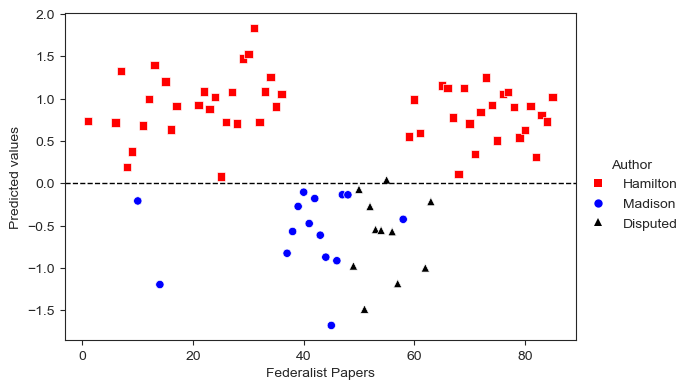

In [35]:
sns.set_style('ticks')

(sns.relplot(
    data=plot_data, x='fed_num', y='pred', hue='author', style='author', 
    palette=['red', 'blue', 'black'], markers = ['s', 'o', '^'],
    height=4, aspect=1.5
).set(xlabel='Federalist Papers', ylabel='Predicted values')
.despine(right=False, top=False)._legend.set_title('Author'))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

## Section 5.2: Network Data {-}

### Section 5.2.1: Marriage Network in Renaissance Florence {-}

In [36]:
florence = pd.read_csv('florentine.csv', index_col='FAMILY')

florence.iloc[:5,:5]

,ACCIAIUOL,ALBIZZI,BARBADORI,BISCHERI,CASTELLAN
FAMILY,,,,,
ACCIAIUOL,0,0,0,0,0
ALBIZZI,0,0,0,0,0
BARBADORI,0,0,0,0,1
BISCHERI,0,0,0,0,0
CASTELLAN,0,0,1,0,0


In [37]:
florence.sum(axis='columns')

FAMILY
ACCIAIUOL    1
ALBIZZI      3
BARBADORI    2
BISCHERI     3
CASTELLAN    3
GINORI       1
GUADAGNI     4
LAMBERTES    1
MEDICI       6
PAZZI        1
PERUZZI      3
PUCCI        0
RIDOLFI      3
SALVIATI     2
STROZZI      4
TORNABUON    3
dtype: int64

### Section 5.2.2: Undirected Graph and Centrality Measures {-}

In [38]:
# Note: if installing from conda forge, install 'python-igraph'
import igraph as ig

florence_g = ig.Graph.Adjacency(florence, mode='undirected')

<Axes: >

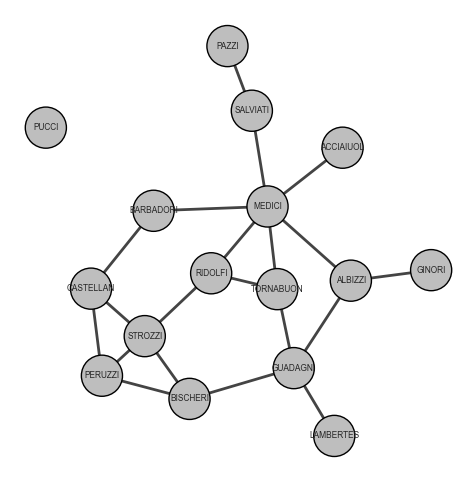

In [39]:
# plot the graph
fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    florence_g,
    target=ax,
    vertex_size=0.6,
    vertex_label=florence_g.vs["name"],
    vertex_label_size=6.0,
    vertex_color='gray'
)

In [40]:
florence_g.degree() # list

[1, 3, 2, 3, 3, 1, 4, 1, 6, 1, 3, 0, 3, 2, 4, 3]

In [41]:
florence_g.vs['name']

['ACCIAIUOL',
 'ALBIZZI',
 'BARBADORI',
 'BISCHERI',
 'CASTELLAN',
 'GINORI',
 'GUADAGNI',
 'LAMBERTES',
 'MEDICI',
 'PAZZI',
 'PERUZZI',
 'PUCCI',
 'RIDOLFI',
 'SALVIATI',
 'STROZZI',
 'TORNABUON']

In [42]:
pd.Series(florence_g.degree(), index=florence_g.vs['name'])

ACCIAIUOL    1
ALBIZZI      3
BARBADORI    2
BISCHERI     3
CASTELLAN    3
GINORI       1
GUADAGNI     4
LAMBERTES    1
MEDICI       6
PAZZI        1
PERUZZI      3
PUCCI        0
RIDOLFI      3
SALVIATI     2
STROZZI      4
TORNABUON    3
dtype: int64

In [43]:
pd.Series(florence_g.closeness(normalized=False), index=florence_g.vs['name'])

ACCIAIUOL    0.026316
ALBIZZI      0.034483
BARBADORI    0.031250
BISCHERI     0.028571
CASTELLAN    0.027778
GINORI       0.023810
GUADAGNI     0.033333
LAMBERTES    0.023256
MEDICI       0.040000
PAZZI        0.020408
PERUZZI      0.026316
PUCCI             NaN
RIDOLFI      0.035714
SALVIATI     0.027778
STROZZI      0.031250
TORNABUON    0.034483
dtype: float64

In [44]:
1 / (pd.Series(florence_g.closeness(normalized=False), 
               index=florence_g.vs['name']) * 15)

ACCIAIUOL    2.533333
ALBIZZI      1.933333
BARBADORI    2.133333
BISCHERI     2.333333
CASTELLAN    2.400000
GINORI       2.800000
GUADAGNI     2.000000
LAMBERTES    2.866667
MEDICI       1.666667
PAZZI        3.266667
PERUZZI      2.533333
PUCCI             NaN
RIDOLFI      1.866667
SALVIATI     2.400000
STROZZI      2.133333
TORNABUON    1.933333
dtype: float64

In [45]:
pd.Series(florence_g.betweenness(directed=False), index=florence_g.vs['name'])

ACCIAIUOL     0.000000
ALBIZZI      19.333333
BARBADORI     8.500000
BISCHERI      9.500000
CASTELLAN     5.000000
GINORI        0.000000
GUADAGNI     23.166667
LAMBERTES     0.000000
MEDICI       47.500000
PAZZI         0.000000
PERUZZI       2.000000
PUCCI         0.000000
RIDOLFI      10.333333
SALVIATI     13.000000
STROZZI       9.333333
TORNABUON     8.333333
dtype: float64

[Text(0.5, 1.0, 'Closeness')]

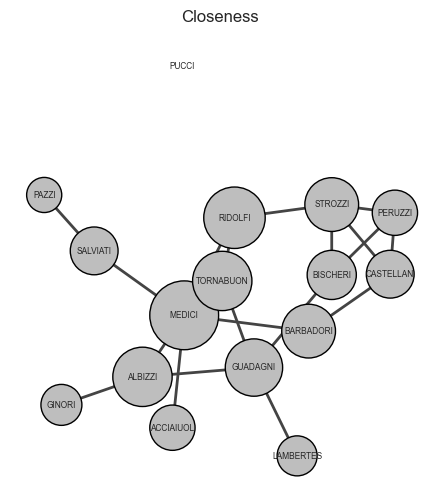

In [46]:
close = pd.Series(florence_g.closeness(normalized=False), 
                  index=florence_g.vs['name'])

close['PUCCI'] = 0

fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    florence_g,
    target=ax,
    vertex_size=close * 25,
    vertex_label=florence_g.vs["name"],
    vertex_label_size=6.0,
    vertex_color='gray',
    bbox=(0, 0, 300, 300),
    margin=20
).set(title='Closeness')

[Text(0.5, 1.0, 'Betweenness')]

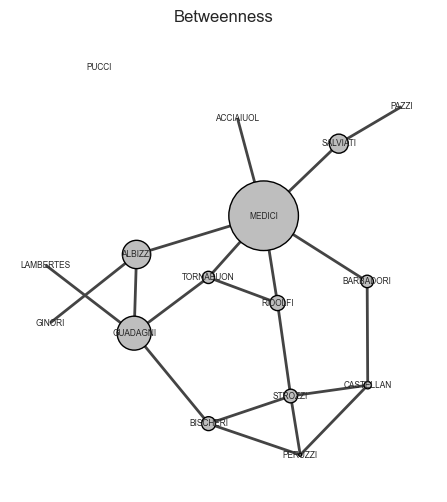

In [47]:
fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    florence_g,
    target=ax,
    vertex_size=pd.Series(florence_g.betweenness(directed=False)) / 50,
    vertex_label=florence_g.vs["name"],
    vertex_label_size=6.0,
    vertex_color='gray',
    bbox=(0, 0, 300, 300),
    margin=20
).set(title='Betweenness')

### Section 5.2.3: Twitter-Following Network {-}

In [48]:
twitter = pd.read_csv('twitter-following.csv')
senator = pd.read_csv('twitter-senator.csv')

n = senator.shape[0] # number of senators

# initialize adjacency matrix
twitter_adj = pd.DataFrame(np.zeros((n, n)), 
                           columns=senator['screen_name'], 
                           index=senator['screen_name'])

# change 0 to 1 when edge goes from node i to node j
for i in range(len(twitter)):
    twitter_adj.loc[twitter.loc[i,'following'], twitter.loc[i,'followed']] = 1

twitter_g = ig.Graph.Adjacency(twitter_adj, mode='directed')

### Section 5.2.4: Directed Graph and Centrality {-}

In [49]:
senator['indegree'] = twitter_g.indegree()
senator['outdegree'] = twitter_g.outdegree()

# 5 greatest indegree
senator.sort_values(by='indegree', ascending=False).head(5)

,screen_name,name,party,state,indegree,outdegree
50,SenJohnMcCain,John McCain,R,AZ,64,15
56,lisamurkowski,Lisa Murkowski,R,AK,60,87
62,senrobportman,Rob Portman,R,OH,58,9
82,SenToomey,Patrick J. Toomey,R,PA,58,50
17,SenatorCollins,Susan M. Collins,R,ME,58,79


In [50]:
# 5 greatest outdegree
senator.sort_values(by='outdegree', ascending=False).head(5)

,screen_name,name,party,state,indegree,outdegree
36,SenDeanHeller,Dean Heller,R,NV,55,89
64,sendavidperdue,David Perdue,R,GA,30,88
77,SenatorTimScott,Tim Scott,R,SC,41,88
20,SenBobCasey,"Robert P. Casey, Jr.",D,PA,43,88
56,lisamurkowski,Lisa Murkowski,R,AK,60,87


In [51]:
# closeness for incoming and outgoing paths
senator['close_in'] = twitter_g.closeness(mode='in', normalized=False)
senator['close_out'] = twitter_g.closeness(mode='out', normalized=False)

# directed and undirected betweenness
senator['betweenness_d'] = twitter_g.betweenness(directed=True)
senator['betweenness_u'] = twitter_g.betweenness(directed=False)

[Text(0.5, 1.0, 'Betweenness'),
 Text(0.5, 0, 'Directed'),
 Text(0, 0.5, 'Undirected')]

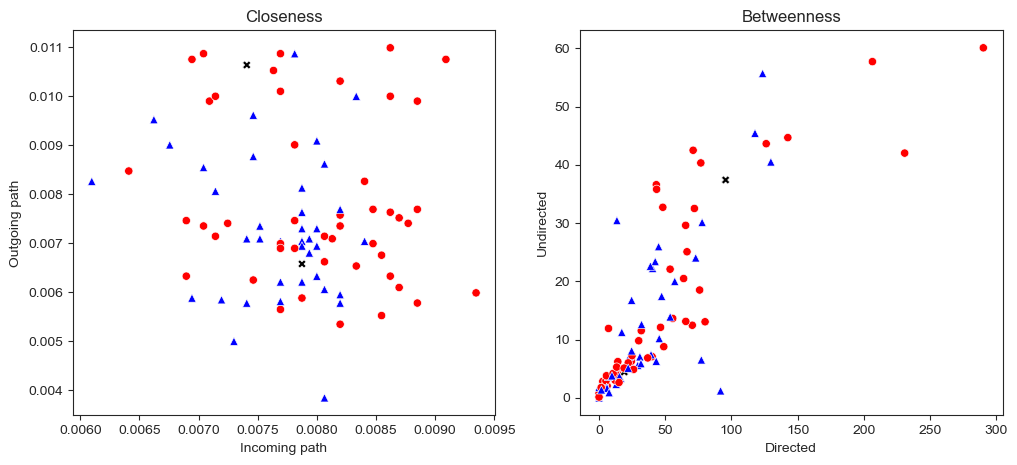

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(
    data=senator, x='close_in', y='close_out', ax=axs[0],
    hue='party', palette=['r', 'b', 'k'], legend=False,
    style='party', markers=['o', '^', 'X']
).set(title='Closeness', xlabel='Incoming path', ylabel='Outgoing path')

sns.scatterplot(
    data=senator, x='betweenness_d', y='betweenness_u', ax=axs[1],
    hue='party', palette=['r', 'b', 'k'], legend=False,
    style='party', markers=['o', '^', 'X']
).set(title='Betweenness', xlabel='Directed', ylabel='Undirected')

[Text(0.5, 1.0, 'Page Rank')]

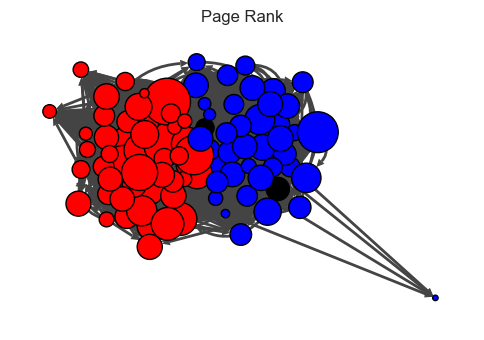

In [53]:
# senator PageRank
senator['pagerank'] = twitter_g.pagerank()

# save colors for plotting
v_color = np.where(senator.party=='R', 'red', 
                   np.where(senator.party=='D', 'blue', 'black'))

fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    twitter_g,
    target=ax,
    vertex_size=senator['pagerank'] * 25,
    vertex_color=v_color,
    bbox=(0, 0, 300, 300),
    margin=20
).set(title='Page Rank')

In [54]:
def PageRank(n, A, d, pr):
    g = ig.Graph.Adjacency(A)
    deg = g.outdegree()
    for j in range(n):
        pr[j] = (1 - d) / n + d * sum(adj[:,j] * pr / deg)
    return pr

nodes = 4

# adjacency matrix with arbitrary values
adj = (np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]).
       reshape(nodes, nodes))

# typical choice of constant
d = 0.85 

# starting values
pr = np.array([1/nodes] * nodes)

# maximum absolute difference; use value greater than threshold
diff = 100

# while loop with 0.001 as the threshold
while diff > 0.001:
    # save the previous iteration
    pr_pre = pr.copy()
    pr = PageRank(n=nodes, A=adj, d=d, pr=pr)
    diff = max(abs(pr - pr_pre))

pr

array([0.22130901, 0.43166231, 0.22095648, 0.13155633])

## Section 5.3: Spatial Data {-}

### Section 5.3.1: The 1854 Cholera Outbreak in Action {-}

### Section 5.3.2: Spatial Data with GeoPandas {-}

This section utilizes the U.S. Census Bureau's [Cartographic Boundary Shapefiles](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html). 

In [55]:
import geopandas as gpd

# read in the shapefile (.shp) of the U.S. states
usa = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

type(usa) # a GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [56]:
# a GeoDataFrame is a pandas DataFrame with 'GeoSeries.'
usa.head() 

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198573403,726463825,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341552329,3387681983,"POLYGON ((-104.05788 44.99761, -104.05078 44.9..."
2,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131185042550,4582333181,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."


In [57]:
usa.shape

(56, 10)

The Census Bureau uses the North American Datum 1983 (NAD83) Coordinate 
Reference System (CRS). 

In [58]:
usa.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

(-127.65372665000001, -64.05923634999999, 23.2781513, 50.6275107)

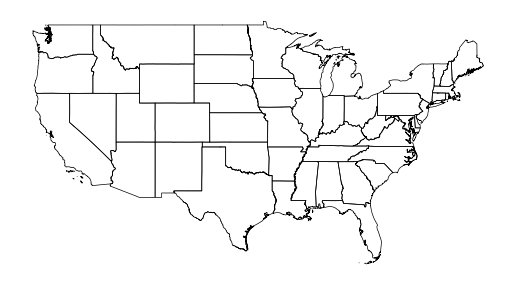

In [59]:
# focus on the continental U.S.
non_cont = ['Alaska', 'Hawaii', 'Puerto Rico', 'United States Virgin Islands',
            'Commonwealth of the Northern Mariana Islands', 'Guam', 
            'American Samoa']

usa_cont = usa.loc[~usa['NAME'].isin(non_cont)].copy().reset_index(drop=True)

usa_cont.boundary.plot(edgecolor='black', linewidth=0.5).axis('off')

In [60]:
# import cities data; source: Becker and others (2021)
us_cities = pd.read_csv('us_cities.csv')

# convert to GeoDataFrame
us_cities = gpd.GeoDataFrame(
    us_cities, 
    geometry=gpd.points_from_xy(us_cities['long'], us_cities['lat']),
    # specify the CRS associated with lat and long measurements
    crs='EPSG:4326'
)

us_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
# subset capitals of continental U.S. states
usa_cont_capitals = (
    us_cities.loc[(us_cities['capital']==2) & 
                  ~us_cities['country_etc'].isin(['AK', 'HI'])]
                  .copy().reset_index(drop=True)
)

In [62]:
# Re-project the usa_cont GeoDataFrame to match the CRS of the us_cities
usa_cont = usa_cont.to_crs(us_cities.crs)

usa_cont.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'US state capitals')

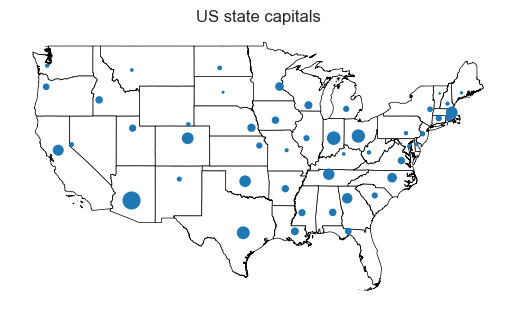

In [63]:
# plot capitals on top of state map
base_map = usa_cont.plot(color='white', edgecolor='black', linewidth=0.5)

usa_cont_capitals.plot(ax=base_map, markersize=usa_cont_capitals['pop']/10000)

base_map.set_axis_off()

base_map.set_title('US state capitals')

In [64]:
california = usa_cont.loc[usa_cont['NAME']=='California']

cal_cities = us_cities.loc[us_cities['country_etc']=='CA']

top7 = cal_cities.sort_values(by='pop', ascending=False).head(7)

# Extract the city name from the name column (i.e., remove 'CA')
top7['city_name'] = top7['name'].str[:-3]

Text(0.5, 1.0, 'Largest cities in California')

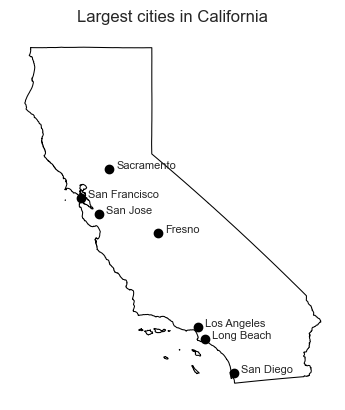

In [65]:
# plot top 7 cities on top of California
cal_map = california.boundary.plot(edgecolor='black', linewidth=0.75)

top7.plot(ax=cal_map, color='black')
  
for i in range(len(top7)):
    plt.annotate(top7.iloc[i]['city_name'], 
                 (top7.iloc[i]['long'] + 0.25, top7.iloc[i]['lat']),
                 fontsize=8)

cal_map.set_axis_off()

cal_map.set_title('Largest cities in California')

In [66]:
# review geometric attributes of states

# geometry type
usa_cont.geom_type.head(5)

0         Polygon
1         Polygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

In [67]:
# geometries
usa_cont.geometry.head(5)

0    POLYGON ((-109.05018 31.48000, -109.04985 31.4...
1    POLYGON ((-104.05788 44.99760, -104.05078 44.9...
2    MULTIPOLYGON (((-118.60442 33.47855, -118.5987...
3    MULTIPOLYGON (((-89.40565 36.52816, -89.39869 ...
4    MULTIPOLYGON (((-88.05337 30.50698, -88.05109 ...
Name: geometry, dtype: geometry

In [68]:
# bounds of each state
usa_cont.bounds.head(5)

,minx,miny,maxx,maxy
0,-109.050177,31.332300,-103.001967,37.000232
1,-104.057879,42.479634,-96.436592,45.945453
2,-124.409588,32.534436,-114.131209,42.009487
3,-89.571509,36.497127,-81.964971,39.147459
4,-88.473226,30.223327,-84.889080,35.008026


### Section 5.3.3: Colors in Matplotlib {-}

In [69]:
import matplotlib.colors as mcolors

# base colors with intensities on rgb scale
mcolors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [70]:
# Number of supported colors from different color palettes
print(len(mcolors.TABLEAU_COLORS))
print(len(mcolors.CSS4_COLORS))
print(len(mcolors.XKCD_COLORS))

10
148
949


In [71]:
# Colors in the CSS4 palette with Hex codes
pd.Series(mcolors.CSS4_COLORS)

aliceblue       #F0F8FF
antiquewhite    #FAEBD7
aqua            #00FFFF
aquamarine      #7FFFD4
azure           #F0FFFF
                 ...   
wheat           #F5DEB3
white           #FFFFFF
whitesmoke      #F5F5F5
yellow          #FFFF00
yellowgreen     #9ACD32
Length: 148, dtype: object

In [72]:
red = (1, 0, 0)
green = (0, 1, 0)
blue = (0, 0, 1)

# case-insensitive hex codes
print(f'''
Red: {mcolors.to_hex(red)}
Green: {mcolors.to_hex(green)}
Blue: {mcolors.to_hex(blue)}''')


Red: #ff0000
Green: #00ff00
Blue: #0000ff


In [73]:
black = (0, 0, 0)
white = (1, 1, 1)

print(f'''
Black: {mcolors.to_hex(black)}
White: {mcolors.to_hex(white)}''')


Black: #000000
White: #ffffff


In [74]:
purple = (0.5, 0, 0.5)
yellow = (1, 1, 0)

print(f'''
Purple: {mcolors.to_hex(purple)}
Yellow: {mcolors.to_hex(yellow)}''')


Purple: #800080
Yellow: #ffff00


(0.5, 4.5)

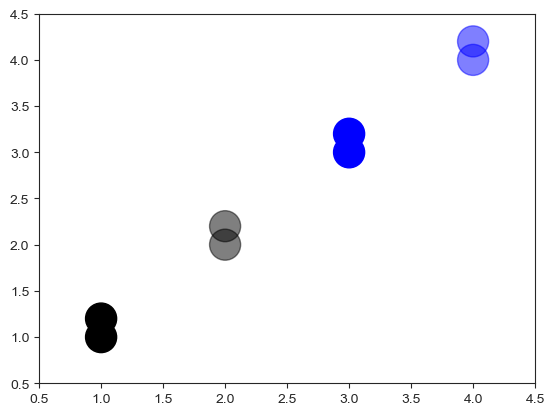

In [75]:
# semi-transparent blue; specify alpha (r, g, b, alpha)
blue_trans = (0, 0, 1, 0.5)
# semi-transparent black
black_trans = (0, 0, 0, 0.5)

x = [1, 1, 2, 2, 3, 3, 4, 4]
y = [1, 1.2, 2, 2.2, 3, 3.2, 4, 4.2]

colors = [black]*2 + [black_trans]*2 + [blue]*2 + [blue_trans]*2
 
# completely colored dots difficult to distinguish
# semi-transparent dots easier to distinguish
plt.figure() # open a new figure
plt.scatter(x, y, s=500, color=colors)
plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)

### Section 5.3.4: US Presidential Elections {-}

In [76]:
pres08 = pd.read_csv('pres08.csv')

# two-party vote share
pres08['Dem'] = pres08['Obama'] / (pres08['Obama'] + pres08['McCain'])
pres08['Rep'] = pres08['McCain'] / (pres08['Obama'] + pres08['McCain'])

# assign red and blue colors based on two-party vote share
pres08['color'] = np.where(pres08['Rep'] > pres08['Dem'], 'r', 'b')

# add tuples of rgb values based on two-party vote share
pres08['color_p'] = pres08.apply(lambda x: (x['Rep'], 0, x['Dem']), axis=1)

pres08['color_p'].head(5)

0     (0.6060606060606061, 0, 0.3939393939393939)
1     (0.6082474226804123, 0, 0.3917525773195876)
2    (0.5454545454545454, 0, 0.45454545454545453)
3     (0.6020408163265306, 0, 0.3979591836734694)
4    (0.37755102040816324, 0, 0.6224489795918368)
Name: color_p, dtype: object

(-124.92350730621236, -113.617289924617, 32.06068362574323, 42.48323956673337)

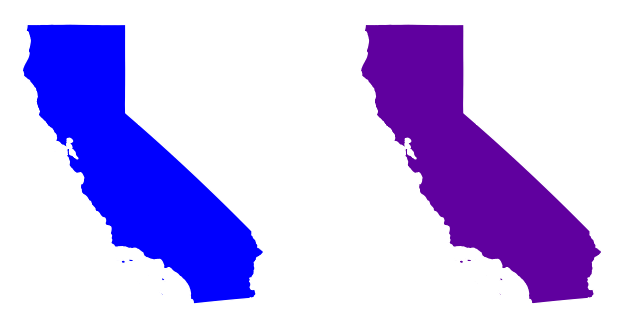

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# California as a blue state
california.plot(ax=axs[0], 
                color=pres08['color'].loc[pres08.state=='CA'].iloc[0])

axs[0].axis('off')

# California as a purple state
california.plot(ax=axs[1], 
                color=pres08['color_p'].loc[pres08.state=='CA'].iloc[0])

axs[1].axis('off')

In [78]:
# merge the GeoDataFrame and the colors from pres08 on state abbreviations
usa_cont = pd.merge(
    usa_cont, pres08[['state', 'color', 'color_p']],
    left_on='STUSPS', right_on='state', how='left'
).drop('state', axis='columns')

usa_cont.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'color', 'color_p'],
      dtype='object')

(-127.65372492089249,
 -64.05923571655354,
 23.278148779981684,
 50.62751082000087)

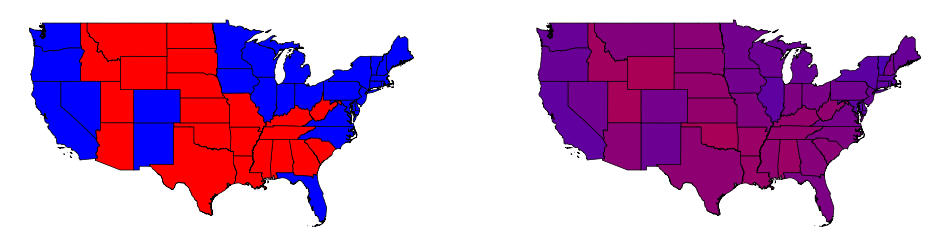

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

usa_cont.plot(ax=axs[0], color=usa_cont['color'], edgecolor='black', 
              linewidth=0.5).axis('off')

usa_cont.plot(ax=axs[1], color=usa_cont['color_p'], edgecolor='black', 
              linewidth=0.5).axis('off')

### Section 5.3.5: Expansion of Walmart {-}

In [80]:
walmart = pd.read_csv('walmart.csv')

walmart.head()

,opendate,st.address,city,state,long,lat,type
0,1962-03-01,5801 SW Regional Airport Blvd,Bentonville,AR,-94.239816,36.350885,DistributionCenter
1,1962-07-01,2110 WEST WALNUT,Rogers,AR,-94.071410,36.342235,SuperCenter
2,1964-08-01,1417 HWY 62/65 N,Harrison,AR,-93.093450,36.236984,SuperCenter
3,1965-08-01,2901 HWY 412 EAST,Siloam Springs,AR,-94.502080,36.179905,SuperCenter
4,1967-10-01,3801 CAMP ROBINSON RD.,North Little Rock,AR,-92.302290,34.813269,Wal-MartStore


In [81]:
walmart['type'].value_counts()

type
SuperCenter           1977
Wal-MartStore         1196
DistributionCenter      78
Name: count, dtype: int64

In [82]:
# create store_type column for easier plotting
walmart['store_type'] = np.where(
    walmart['type']=='Wal-MartStore', 'Store',
    np.where(walmart['type']=='SuperCenter', 'Supercenter', 'Distribution')
)

# convert to categorical and reorder categories
walmart['store_type'] = (
    walmart['store_type'].astype('category').cat.reorder_categories(
        ['Store', 'Supercenter', 'Distribution'])
) 

# add marker size column
walmart['msize'] = np.where(walmart['store_type']=='Distribution', 30, 10)

# convert to GeoDataFrame
walmart = gpd.GeoDataFrame(
    walmart, 
    geometry=gpd.points_from_xy(walmart['long'], walmart['lat']),
    crs='EPSG:4326'
)

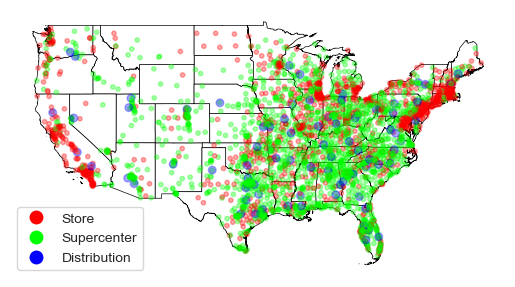

In [83]:
# define colors and transparency
store = (1, 0, 0, 1/3)
supercenter = (0, 1, 0, 1/3)
distribution = (0, 0, 1, 1/3)

# plot Walmart locations on top of state map
usa_map = usa_cont.plot(color='white', edgecolor='black', linewidth=0.5)

walmart.plot(ax=usa_map, column='store_type', categorical=True, legend=True,
             markersize=walmart['msize'],
             # define custom colormap 
             cmap=mcolors.ListedColormap([store, supercenter, distribution]))

usa_map.set_axis_off()

### Section 5.3.6: Animation in Matplotlib {-}

**In Progress**

## References {-}

Becker, Richard A., Allan R. Wilks, Ray Brownrigg, Thomas P. Minka, and Alex
Deckmyn. 2021. maps: Draw Geographical Maps. R package version 3.4.0. Original 
S code by Richard A. Becker and Allan R. Wilks. R version by Ray Brownrigg. 
Enhancements by Thomas P Minka and Alex Deckmyn. 
https://CRAN.R-project.org/package=maps.